## Start

Здравствуйте! В этой лабораторной работе Вы напишите свою (возможно, первую) нейронку почти с нуля, чтобы закрепить понимание основных принципов работы и используемой для этого математики. В качестве задачи для нейронки будет классификация изображений из датасета [Fashion-MNIST](https://github.com/zalandoresearch/fashion-mnist) (описан далее).

Так как нейронку нужно написать почти с нуля, запрещается использовать фреймворки для разработки нейросетей (например, PyTorch и TensorFlow). Вы можете выполнить работу на любом языке программирования, при этом разрешается использовать только библиотеки для манипуляции с матрицами (потому что, я надеюсь, написать транспонирование, сложение и умножение матриц Вы уже в состоянии), а также инструменты визуализации (например, чтобы построить график). Если Вы выполняете эту работу на Python в Google Colab, то Вам будет достаточно NumPy и Matplotlib и ничего импортировать Вам больше не нужно.

За неделю до выдачи задания я дал Вам ссылку на бесплатный курс [Intro to Deep Learning with PyTorch](https://www.udacity.com/course/deep-learning-pytorch--ud188), в котором во втором уроке изложены основы с формулами для построения нейросети. Информация там достаточно концентрированная, поэтому некоторые видео можно пересмотреть по несколько раз, чтобы лучше понять. Возможно, Вы даже выполнили задания в курсе, чтобы закрепить полученную информацию (чисто для себя, я этого не требовал).

Дополнительно могу порекомендовать YouTube канал [3Blue1Brown](https://www.youtube.com/c/3blue1brown) с плейлистом [Neural networks](https://www.youtube.com/playlist?list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi), в котором достаточно подробно и понятно описывается необходимая Вам математика, при этом всё сопровождается отличной визуализацией.

И напоследок, не стесняйтесь задавать вопросы преподавателю. И успехов!

Давайте начнём со знакомых Вам импортов NumPy и Matplotlib.

Подсказка: вот список функций NumPy, которые понадобятся Вам в этой работе:
* [arange](https://numpy.org/doc/stable/reference/generated/numpy.arange.html);
* [argmax](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html);
* [exp](https://numpy.org/doc/stable/reference/generated/numpy.exp.html);
* [mean](https://numpy.org/doc/stable/reference/generated/numpy.mean.html);
* [ndarray.T](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.T.html);
* [ndarray.max](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.max.html);
* [ndarray.shape](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.shape.html);
* [ndarray.size](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.size.html);
* [np.dot](https://numpy.org/doc/stable/reference/generated/numpy.dot.html);
* [random.normal](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html);
* [sum](https://numpy.org/doc/stable/reference/generated/numpy.sum.html);
* [zeros](https://numpy.org/doc/stable/reference/generated/numpy.zeros.html).

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import numba

Теперь поговорим о датасете. Часто в начале изучения нейронок используют датасет [рукописных чисел MNIST](http://yann.lecun.com/exdb/mnist/), но это слишком просто и скучно. Мы же попробуем обучить нейронку на датасете [Fashion-MNIST](https://github.com/zalandoresearch/fashion-mnist), который идентичен первому по формату (достаточно просто заменить файлы с данными), но не такой простой и больше соответствует задачам компьютерного зрения.

Входные данные - изображения с разрешением 28x28 пикселей в оттенках серого, на которых изображены различные элементы одежды и, внезапно, сумки (меня не спрашивайте, я не знаю).

Выходные данные - номер класса. Всего есть 10 классов: T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot.

Датасет разделён на две части: 60 000 картинок для обучения и 10 000 картинок для тестирования.

Чтобы скачать датасет, достаточно использовать [wget](https://linux.die.net/man/1/wget).

In [2]:
!wget http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz
!wget http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz
!wget http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-images-idx3-ubyte.gz
!wget http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-labels-idx1-ubyte.gz

--2021-12-27 09:38:02--  http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz
Resolving fashion-mnist.s3-website.eu-central-1.amazonaws.com (fashion-mnist.s3-website.eu-central-1.amazonaws.com)... 52.219.169.132
Connecting to fashion-mnist.s3-website.eu-central-1.amazonaws.com (fashion-mnist.s3-website.eu-central-1.amazonaws.com)|52.219.169.132|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26421880 (25M) [binary/octet-stream]
Saving to: ‘train-images-idx3-ubyte.gz’

train-images-idx3-u 100%[===================>]  25.20M  15.4MB/s    in 1.6s    

2021-12-27 09:38:03 (15.4 MB/s) - ‘train-images-idx3-ubyte.gz’ saved [26421880/26421880]

--2021-12-27 09:38:04--  http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz
Resolving fashion-mnist.s3-website.eu-central-1.amazonaws.com (fashion-mnist.s3-website.eu-central-1.amazonaws.com)... 52.219.169.132
Connecting to fashion-mnist.s3-website.eu-central-1.a

Теперь возьмём готовую функцию для чтения датасета из файлов в NumPy массивы.

In [3]:
# Source: https://github.com/zalandoresearch/fashion-mnist/blob/master/utils/mnist_reader.py

def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

Используя эту функцию, загрузим датасет в память.

In [4]:
images_train, labels_train = load_mnist('.', kind='train')
images_test, labels_test = load_mnist('.', kind='t10k')

Посмотрим, какая форма у полученных массивов.

In [5]:
print(images_train.shape)
print(labels_train.shape)
print(images_test.shape)
print(labels_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


Как видим, всё достаточно понятно:
* 60000 - количество картинок с подписями для обучения;
* 10000 - количество картинок с подписями для тестирования;
* 784 - количество пикселей в одной картинке ($28 \times 28 = 784$).

Также для удобства объявим список названий классов, чтобы выводить на экран не числа, а понятные слова.

In [6]:
classes = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Чисто из любопытства посмотрим на одно из изображений и подпись к нему.

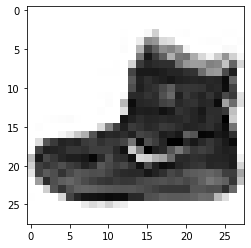

9 Ankle boot


In [7]:
plt.imshow(images_train[0].reshape(28,28), cmap='Greys')
plt.show()
print(labels_train[0], classes[labels_train[0]])

## One hot, danger zone

Узнали Ankle boot? Согласны?

Хорошо, теперь данные нужно подготовить для использования в нейросети:
* отделить небольшой кусок (5 000) от данных для обучения, чтобы использовать его для валидации;
* нормализовать входные данные (изображения), чтобы значения были не в диапазоне 0 - 255, а диапазоне 0 - 1;
* представить выходные данные (подписи) в унитарном коде (one-hot), например 3 станет [0, 0, 0, 1, 0, 0, 0, 0, 0, 0].

Начнём с того, что реализуем вспомогательную функцию `one_hot_encode`, которая принимает на входе одномерный NumPy массив `a` и возвращает двухмерный NumPy массив с унитарным кодом.

In [8]:
def one_hot_encode(a):
  return np.eye(10)[a.reshape(-1)]

Теперь выполним описанную выше подготовку данных.

In [9]:
### DANGER ZONE - REPEAT ONCE ###
norm = 255  # np.max(np.abs(images_train))
images_train_norm = images_train/norm  #np.apply_along_axis(lambda x: x/norm, 0, images_train)

shuffler = np.random.permutation(len(images_train_norm)) # shuffle arrays together
images_train_norm_shuffled = images_train_norm[shuffler]
labels_train_shuffled = labels_train[shuffler]

x_train, x_val = tuple(np.split(images_train_norm_shuffled, [55000]))
y_train = one_hot_encode(labels_train_shuffled[:55000])
y_val = one_hot_encode(labels_train_shuffled[55000:60000])

x_test = images_test/norm
y_test = one_hot_encode(labels_test)

Проверьте, что получилось похоже на правду.

In [10]:
print(x_train.shape, x_train.min(), x_train.max())
print(y_train.shape)
print(x_val.shape, x_val.min(), x_val.max())
print(y_val.shape)
print(x_test.shape, x_test.min(), x_test.max())
print(y_test.shape)

(55000, 784) 0.0 1.0
(55000, 10)
(5000, 784) 0.0 1.0
(5000, 10)
(10000, 784) 0.0 1.0
(10000, 10)


## Sigmoid & co

Получилось? Отлично!

Теперь реализуем ещё пару вспомогательных функций:
* `sigmoid` - сигмодиа (будем использовать её в качестве функции активации);
* `sigmoid_prime` - производная сигмоиды (для обратного распространения ошибки).

Обе функции принимают на входе NumPy массив произвольной формы и возвращают NumPy массив такой же формы, применив соответствующие функции независимо для каждого элемента.

In [11]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def sigmoid_prime(x):
  return sigmoid(x) * (1-sigmoid(x))

## ANN

Теперь перейдём к самой главной и сложной части - написанию класса нейросети. Нейросеть у нас будет достаточно простой - многослойный перцептрон. У нас будут такие слои:
* входной слой на 784 входа, по одному на каждый пиксель входного изображения;
* скрытый слой с 512 нейронами (функция активации - сигмоида);
* скрытый слой с 128 нейронами (функция активации - сигмоида);
* выходной слой с 10 нейронами (функция активации - сигмоида), по одному на каждый класс.

Вам нужно реализовать 3 функции:
* `__init__` - конструктор, который будет инициализировать веса ($W$ и $b$) псевдо-случайными числами, чтобы происходило обучение;
* `feedforward` - функция прямого распространения данных по нейросети, аргумент `x` - одно или несколько входных изображений (т.е. одномерный или двухмерный массив), возвращает результат работы нейросети (класс входного изображения в унитарном коде по мнению нейросети);
* `backpropagation` - функция обратного распространения ошибки, аргумент `x` - несколько входных изображений, аргумент `y` - сколько же подписей к этим изображениям в унитарном коде, аргумент `learning_rate` - коэффициент обучения, ничего не возвращает, но корректирует веса.

In [12]:
class ANN:
  def __init__(self):
    self.size0 = 784
    self.size1 = 512
    self.size2 = 128
    self.size3 = 10
    scale_ = 1 / self.size0 ** .5 # используйте в np.random.normal
    np.random.seed(0)

    self.W0 = np.random.normal(scale=scale_, size=(self.size1, self.size0))
    self.W1 = np.random.normal(scale=scale_, size=(self.size2, self.size1))
    self.W2 = np.random.normal(scale=scale_, size=(self.size3, self.size2))

    self.b0 = np.random.normal(scale=scale_, size=self.size1)
    self.b1 = np.random.normal(scale=scale_, size=self.size2)
    self.b2 = np.random.normal(scale=scale_, size=self.size3)

    self.z2, self.z1, self.z0 , self.a1, self.a0 = 0, 0, 0, 0, 0


  def feedforward(self, x):
    self.z0 = np.matmul(x, self.W0.T) + self.b0
    self.a0 = sigmoid(self.z0)
    self.z1 = np.matmul(self.a0, self.W1.T) + self.b1
    self.a1 = sigmoid(self.z1)
    self.z2 = np.matmul(self.a1, self.W2.T) + self.b2
    result = sigmoid(self.z2)
    return result

  def backpropagation(self, X, Y, learning_rate):
    
    Y_res = self.feedforward(X)

    delta2 =  2*(Y_res-Y) * sigmoid_prime(self.z2) # 3rd layer error
    delta1 = np.matmul(delta2, self.W2) * sigmoid_prime(self.z1) # 2nd layer error
    delta0 = np.matmul(delta1, self.W1) * sigmoid_prime(self.z0) # 1st layer error

    # 3rd layer
    self.W2 -= learning_rate * np.matmul(delta2.T, self.a1)
    self.b2 -= learning_rate * np.sum(delta2, axis=0)

    # 2nd layer
    self.W1 -= learning_rate * np.matmul(delta1.T, self.a0)
    self.b1 -= learning_rate * np.sum(delta1, axis=0)

    # 1st layer
    self.W0 -= learning_rate * np.matmul(delta0.T, X)
    self.b0 -= learning_rate * np.sum(delta0, axis=0)


$\delta_i =  $

## Checks + MSE + ACC

Реализовали? Отлично! Работает? Не думаю, что с первого раза :) Давайте проверять по порядку. Начнём с конструктора.

In [13]:
ann = ANN()

Надеюсь, у Вас он выполнился без ошибок. Теперь давайте проверим `feedforward`, просто скормив нейронке одно изображение.

In [14]:
ann.feedforward(x_train[0])

array([0.54443027, 0.62251468, 0.50121767, 0.51670078, 0.54690469,
       0.54441974, 0.58209934, 0.49021235, 0.54660219, 0.50486652])

Если вы получили 10 чисел со значениями примерно 0.5, то так и должно быть, потому что нейросеть пока не обучена. В итоге должно получиться больше похоже на подпись (правильный ответ) из датасета.

In [15]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

Ну что, время запустить обучение? Не так быстро. Как вообще понять, что нейронка обучается? Правильно, смотреть на функцию ошибки. Ну, и на точность тоже можно. Давайте реализуем эти вспомогательные функции.

* `mse` - [mean squared error](https://en.wikipedia.org/wiki/Mean_squared_error), средний квадрат ошибки;
* `acc` - accuracy, точность определения номера класса.

Аргументы `a` и `b` - массивы классов в унитарном коде. Один - результат работы нейронки, другой - из датасета, или наоборот (без разницы).

In [16]:
def mse(a, b):
  difference_array = np.subtract(a, b)
  squared_array = np.square(difference_array)
  return squared_array.mean()

def acc(a, b):
  return np.mean(np.equal(np.argmax(b, axis=-1), np.argmax(a, axis=-1)))

Давайте их проверим на тестовом датасете для нашей необученной нейронки.

In [17]:
print("MSE", mse(ann.feedforward(x_test), y_test))
print("ACC", acc(ann.feedforward(x_test), y_test))

MSE 0.284102570994527
ACC 0.1


Собственно, MSE очень большая, а ACC очень маленькая. При 10 классах точность 0.1 - это просто рандом.

Давайте теперь проверим, работает ли `backpropagation`. Запустим обучение на одном батче (небольшом подмножестве данных) небольшое количество эпох и будем смотреть на MSE.

##test

In [18]:
ann = ANN()
for epoch in range(10):
  ann.backpropagation(x_train[:50], y_train[:50], learning_rate=0.001)
  print("Epoch", epoch, "MSE", mse(ann.feedforward(x_train[:50]), y_train[:50]))

Epoch 0 MSE 0.20612454875982567
Epoch 1 MSE 0.15971410791148755
Epoch 2 MSE 0.13407721980206508
Epoch 3 MSE 0.11940461776700799
Epoch 4 MSE 0.11047280443354472
Epoch 5 MSE 0.10470929795755118
Epoch 6 MSE 0.1008036681084879
Epoch 7 MSE 0.09804856881726212
Epoch 8 MSE 0.09603979644248992
Epoch 9 MSE 0.09453441763115308


## Training

Если Вы увидели, что MSE уменьшается с каждой эпохой, то Вы на правильном пути. Если нет, то, скорее всего, где-то ошибка.

Надеюсь, у Вас получилось добиться уменьшения ошибки. Теперь можно и реализовать полноценное обучение.

In [19]:
ann = ANN() # начнём обучения с изначального состояния нейронки

mse_val_prev = np.Inf # будем помнить предыдущее значение mse на валидационной выборке, чтобы не переобучиться
mse_train_list = [] # будем хранить список значений mse и acc для выборок для обучения и валидации, чтобы потом построить график 
mse_val_list = []
acc_train_list = []
acc_val_list = []

In [20]:
batch_size = 50 # размер батча, т.е. по сколько картинок с подписями используется для коррекции весов за один раз

for epoch in range(50):
  for batch in range(int(x_train.shape[0]/batch_size)): # replace ??? with your code here
    x_train_batch = x_train[batch*batch_size:(batch+1)*batch_size]
    #print(x_train_batch.shape)
    y_train_batch = y_train[batch*batch_size:(batch+1)*batch_size]
    ann.backpropagation(x_train_batch, y_train_batch, learning_rate=0.001)

  y_train_output = ann.feedforward(x_train)
  y_val_output = ann.feedforward(x_val)
  
  mse_train = mse(y_train_output, y_train)
  mse_val = mse(y_val_output, y_val)
  acc_train = acc(y_train_output, y_train)
  acc_val = acc(y_val_output, y_val)

  mse_train_list.append(mse_train)
  mse_val_list.append(mse_val)
  acc_train_list.append(acc_train)
  acc_val_list.append(acc_val)

  print("Epoch", epoch, "MSE_train", mse_train, "MSE_val", mse_val, "ACC_train", acc_train, "ACC_val", acc_val)
  if mse_val > mse_val_prev: # если ошибка на валидационной выборке начала увеличиваться, останавливаем обучение
    print("MSE_val is increasing! Stopping.")
    break
  mse_val_prev = mse_val

Epoch 0 MSE_train 0.08916309593511043 MSE_val 0.08916936049033283 ACC_train 0.2634 ACC_val 0.2646
Epoch 1 MSE_train 0.08326714493173926 MSE_val 0.08332580185046425 ACC_train 0.3014909090909091 ACC_val 0.3
Epoch 2 MSE_train 0.06936316075667309 MSE_val 0.06920339406529462 ACC_train 0.4415818181818182 ACC_val 0.4482
Epoch 3 MSE_train 0.062399632941460004 MSE_val 0.062104001325583996 ACC_train 0.5438181818181819 ACC_val 0.5554
Epoch 4 MSE_train 0.056183631751045016 MSE_val 0.055672302826509076 ACC_train 0.6122909090909091 ACC_val 0.623
Epoch 5 MSE_train 0.049252284714576884 MSE_val 0.048532650157987675 ACC_train 0.6816727272727273 ACC_val 0.689
Epoch 6 MSE_train 0.042795752490035234 MSE_val 0.04195864846775884 ACC_train 0.7195636363636364 ACC_val 0.7274
Epoch 7 MSE_train 0.03908383342578563 MSE_val 0.03822502649567014 ACC_train 0.7352363636363637 ACC_val 0.744
Epoch 8 MSE_train 0.036800381274514814 MSE_val 0.03597034161612509 ACC_train 0.7470363636363636 ACC_val 0.7528
Epoch 9 MSE_train 0.

У меня выполнение обучения заняло примерно 8 минут, что не так много. Ради любопытства можете увеличить количество эпох, например до 500 и посмотреть, что будет. Но учтите, что Google Colab это может не понравиться.

Давайте построим графики зависимостей MSE и ACC от эпохи.

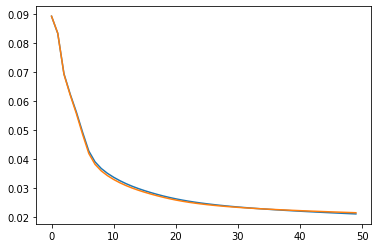

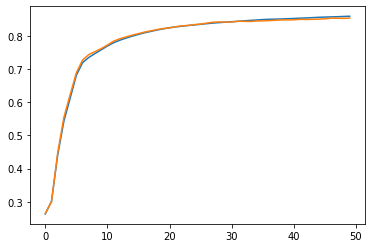

In [21]:
plt.plot(mse_train_list)
plt.plot(mse_val_list)
plt.show()
plt.plot(acc_train_list)
plt.plot(acc_val_list)
plt.show()

Как видно, нейросеть неплохо обучилась и, наверное, может немного обучиться немного ещё.

Давайте теперь на тестовых данных проверим точность. Тестовые данные нейросеть не видела, поэтому только их можно использовать для окончательной оценки точности работы нейронки. 

In [22]:
y_test_output = ann.feedforward(x_test)
acc(y_test_output, y_test)

0.8411

Как я думаю, можно уверенно сказать, что у Вас должно получиться обучить нейронку до 80% точности.

Давайте подробнее проанализируем результат, что нейронка классифицирует без особых проблем, а где много ошибается. Это можно сделать, построив матрицу 10x10, в которой:
* строка - номер класса, изображение которого показали нейронке;
* столбец - номер класса, который выдала нейронка;
* значение в элементе - доля таких случаев.

При этом сумма значений по каждой строке равна 1.

In [23]:
def get_prediction(labels):
  labels = [np.argmax(l) for l in labels]
  return np.array(labels)

In [24]:
def one_hot_to_normal(labels):
  return np.array([np.argmax(l) for l in labels])

In [25]:
def compute_confusion_matrix(y_labels, pred):
  result = np.zeros((10, 10))
  for i, j in zip(y_labels, pred):
      result[i][j] += 1
  for i in range(10):
    result[i] = result[i]/np.sum(result[i])
  return result


In [26]:
result_matrix = compute_confusion_matrix(labels_test, get_prediction(y_test_output))
print(result_matrix)


[[0.803 0.001 0.012 0.05  0.006 0.001 0.112 0.    0.015 0.   ]
 [0.005 0.94  0.011 0.03  0.008 0.    0.004 0.001 0.001 0.   ]
 [0.016 0.    0.685 0.012 0.149 0.    0.13  0.    0.008 0.   ]
 [0.028 0.01  0.01  0.859 0.04  0.    0.049 0.    0.004 0.   ]
 [0.    0.001 0.067 0.036 0.78  0.    0.109 0.    0.007 0.   ]
 [0.    0.    0.    0.001 0.    0.897 0.    0.056 0.01  0.036]
 [0.134 0.002 0.074 0.04  0.094 0.001 0.625 0.    0.03  0.   ]
 [0.    0.    0.    0.    0.    0.029 0.    0.922 0.    0.049]
 [0.    0.001 0.005 0.006 0.004 0.003 0.025 0.005 0.951 0.   ]
 [0.    0.    0.    0.    0.    0.011 0.    0.039 0.001 0.949]]


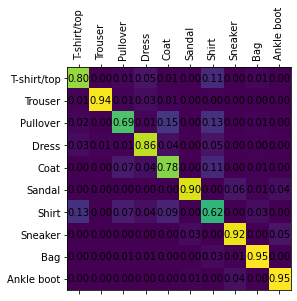

In [27]:
plt.matshow(result_matrix)
for (x, y), v in np.ndenumerate(result_matrix):
  plt.text(y, x, f"{v:.2f}", va="center", ha="center")
plt.xticks(np.arange(10), classes, rotation='vertical')
plt.yticks(np.arange(10), classes)
plt.show()

Красиво отобразим эту матрицу.

Что-то с Shirt не задалось, а в остальном лучше. Также немного путает Pullover и Coat.

Допустим, нас устраивает результат обучения и мы хотим его сохранить, чтобы не обучить заново. NumPy позволяет сделать это достаточно просто.

## Save/Load

In [28]:
with open('ann.npy', 'wb') as f:
  np.save(f, ann.W0)
  np.save(f, ann.b0)
  np.save(f, ann.W1)
  np.save(f, ann.b1)
  np.save(f, ann.W2)
  np.save(f, ann.b2)

Весы сохранены в файл `ann.py`, который Вы теперь можете скачать себе, чтобы он не пропал из Google Colab. Для этого нажмите View -> Table of contents, переключаетесь на Files, у ann.npy на три точки и Download.

Потом Вы можете загрузить этот файл обратно и прочитать из него веса.

In [29]:
with open('ann.npy', 'rb') as f:
  ann.W0 = np.load(f)
  ann.b0 = np.load(f)
  ann.W1 = np.load(f)
  ann.b1 = np.load(f)
  ann.W2 = np.load(f)
  ann.b2 = np.load(f)

In [30]:
print(ann.W0[0][0], ann.W1[0][0], ann.W2[0][0])
print(ann.b0[0], ann.b1[0], ann.b2[0])

0.06299974875149035 -0.003780354708832627 -0.4380333714315224
0.025583548946015944 0.009519426094535427 -0.018703430595608726


## auto-test
Собственно, на этом всё. Если у Вас получилось всё сделать, то поздравляю!

Собственно, на этом всё. Если у Вас получилось всё сделать, то поздравляю!

Теперь осталось сдать работу в автоматическом режиме. Для начала немного вспомогательного кода.

In [ ]:
import urllib.request
from json import dumps, loads

server = "https://eztester.agridnev.com"
task_id = 16

def auto_test(func):
  response = urllib.request.urlopen(server + "/task/" + str(task_id) + "?secret=" + secret)
  token = response.read().decode("utf-8")
  response = urllib.request.urlopen(server + "/data/images?case=0&token=" + token)
  images = np.frombuffer(response.read(), dtype=np.uint8).reshape(-1, 784)
  labels = func(images)
  req = urllib.request.Request(server + "/solution?token=" + token)
  req.add_header("Content-Type", "application/json")
  data = dumps(labels.tolist()).encode('utf-8')
  req.add_header('Content-Length', len(data))
  response = urllib.request.urlopen(req, data)
  print("Passed! First time passed:", response.read().decode("utf-8"))

def print_info():
  response = urllib.request.urlopen(server + "/user?secret=" + secret)
  info = loads(response.read().decode("utf-8"))
  print("Full name:", info["name"])
  print("Group:", info["group"])
  print("Tasks: (id --- name --- solution)")
  for id in info["tasks"]:
    task = info["tasks"][id]
    print(id, "---", task["name"], "---", task["solution"])

Далее Ваш секрет.

In [ ]:
secret = "faaf64fa1f4b461fa2d627ffaec3ce4a"

Теперь реализуйте функцию, которая определяет классы (0-9) для входных изображений.

In [ ]:
def your_function(images):
  norm = 255
  images_norm = images/norm
  labels = ann.feedforward(images_norm)
  # labels = [[1 if i == np.max(l) else 0 for i in l] for l in labels]
  labels = [np.argmax(l) for l in labels]
  return np.array(labels)


In [ ]:
your_function(x_test)

array([5, 5, 5, ..., 5, 5, 5])

И запустите автоматическую проверку.

In [ ]:
auto_test(your_function)

Passed! First time passed: "2021-12-16T09:57:56.179112"


А также проверьте, что у Вас всё (что Вы сдавали) засчитано.

In [ ]:
print_info()

Full name: Базин Антон Владимирович
Group: Б18-503
Tasks: (id --- name --- solution)
1 --- 0a - Hello world --- 2021-09-03T13:30:08.095889
2 --- 0b - Hello NumPy --- 2021-09-09T10:47:28.096867
3 --- 0c - Hello OpenCV --- 2021-09-09T11:06:22.783564
4 --- 1a - Basic Filters --- 2021-09-24T11:29:11.231459
7 --- 2a - PID --- 2021-09-27T19:22:25.281888
8 --- 2b - PID + BB --- 2021-09-27T19:25:56.709593
10 --- 3a - FFT --- 2021-09-30T11:28:37.456427
11 --- 3b - FFT + Audio --- 2021-10-17T09:40:10.226226
13 --- 4a - Haar --- 2021-12-09T11:20:16.577064
16 --- 5a - ANN --- 2021-12-16T09:57:56.179112
